In [1]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import time_support

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

/home/paula/anaconda3/envs/sunpy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tstart = "2022-04-20 03:40"
tend = "2022-04-20 04:30"
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
result

Start Time,End Time,Instrument,SatelliteNumber,Physobs,Source,Provider,Resolution
Time,Time,str3,int64,str10,str4,str4,str5
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,16,irradiance,GOES,NOAA,flx1s
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,16,irradiance,GOES,NOAA,avg1m
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,17,irradiance,GOES,NOAA,flx1s
2022-04-20 00:00:00.000,2022-04-20 23:59:59.999,XRS,17,irradiance,GOES,NOAA,avg1m


In [3]:
result_goes16 = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(16), a.Resolution("flx1s"))
print(result_goes16)

Results from 1 Provider:

1 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        ... Provider Resolution
----------------------- ----------------------- ... -------- ----------
2022-04-20 00:00:00.000 2022-04-20 23:59:59.999 ...     NOAA      flx1s




In [4]:
file_goes16 = Fido.fetch(result_goes16)

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  2.32file/s]


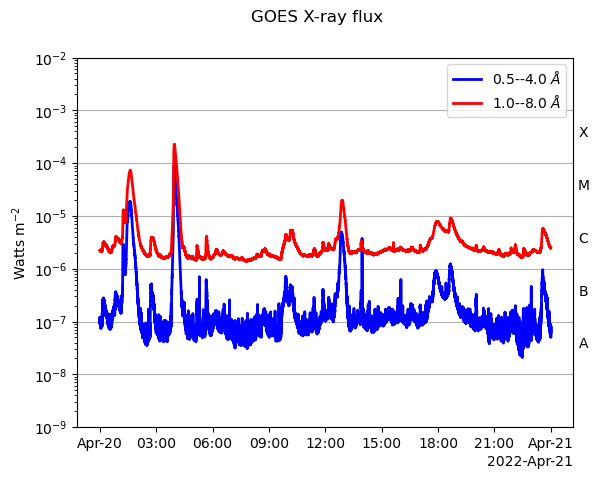

In [5]:
goes_16 = ts.TimeSeries(file_goes16)
goes_16.peek()